# The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are:

Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	truck

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import *

In [21]:
from keras.callbacks import EarlyStopping

In [30]:
from keras.datasets import cifar10

In [31]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [32]:
print(x_train.shape, y_train.shape), print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


(None, None)

In [33]:
class_name = ['airplane','automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
#Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [37]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [38]:
y_train.dtype

dtype('float32')

In [ ]:
#Building Model

In [47]:
dnn = Sequential()
dnn.add(Flatten())
dnn.add(Dense(516, input_dim=2, activation='relu', input_shape=(32,32,3)))
#dnn.add(Dropout(0.25))
dnn.add(Dense(256, activation='relu'))
#dnn.add(Dropout(0.5))
dnn.add(Dense(128, activation='relu'))
dnn.add(Dense(64, activation='relu'))
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(10, activation='softmax'))
callback = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')
dnn.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [48]:
history = dnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, callbacks=callback)

Epoch 1/50
1563/1563 [==============================] - 11s 5ms/step - loss: 1.9381 - accuracy: 0.2818 - val_loss: 1.7760 - val_accuracy: 0.3529
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7252 - accuracy: 0.3777 - val_loss: 1.6956 - val_accuracy: 0.3827
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6432 - accuracy: 0.4086 - val_loss: 1.6432 - val_accuracy: 0.4090
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5833 - accuracy: 0.4303 - val_loss: 1.5597 - val_accuracy: 0.4397
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5418 - accuracy: 0.4465 - val_loss: 1.5910 - val_accuracy: 0.4358
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4996 - accuracy: 0.4599 - val_loss: 1.5250 - val_accuracy: 0.4551
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4704 - accuracy: 0.4711 - val_loss: 1.5118 - val_accuracy

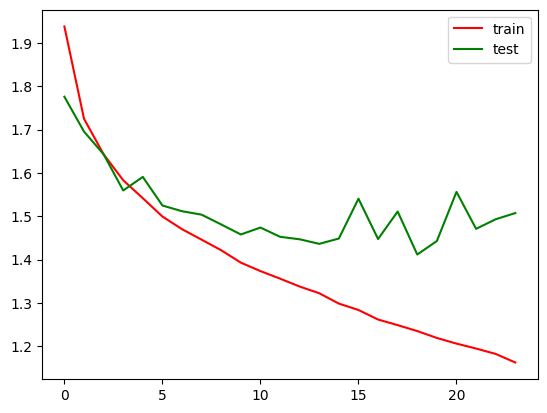

In [49]:
plt.plot(history.history['loss'], label='train', color='red')
plt.plot(history.history['val_loss'], label='test', color='green')
plt.legend()
plt.show()

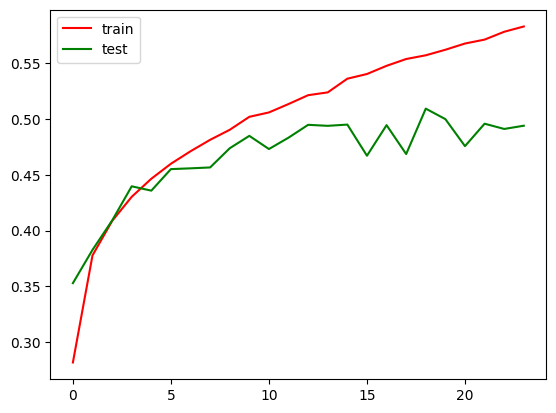

In [50]:
plt.plot(history.history['accuracy'], label='train', color='red')
plt.plot(history.history['val_accuracy'], label='test', color='green')
plt.legend()
plt.show()